
Welcome to the main menu. What would you like to do?

Recommended: Read help section before your first trade for valuable tips and information!

Currency: USD
Available cash: $16088.0

Current portfolio value: $13911.9998

Current Time: 10:26:07
Current Day: Saturday

Stock market status: CLOSED
Cryptocurrency market status: OPEN

 Press 1 if you want to open price finder 
 Press 2 if you want to buy shares 
 Press 3 if you want to sell shares 
 Press 4 if you want to refresh your portfolio 
 Press 5 if you want to view your portfolio 
 Press 6 if you want to restart your portfolio 
 Press 7 if you want to add cash to your account 
 Press 8 if you want to exit the program 
 Press 0 if you want to go to the help section: 
Enter choice: 5

Information:
Portfolio values are based on the latest respective closing price.
The value of your portfolio on a non-trading day (weekends) reflects the closing price of the previous Friday!

 Press 1 for current portfolio performance (table) 
 Press 

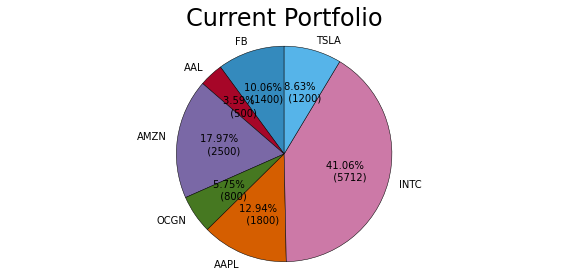


Do you want to continue in your portfolio? (yes/no): no

OK! Returning you to the main menu!

Welcome to the main menu. What would you like to do?

Recommended: Read help section before your first trade for valuable tips and information!

Currency: USD
Available cash: $16088.0

Current portfolio value: $13911.9998

Current Time: 10:28:08
Current Day: Saturday

Stock market status: CLOSED
Cryptocurrency market status: OPEN

 Press 1 if you want to open price finder 
 Press 2 if you want to buy shares 
 Press 3 if you want to sell shares 
 Press 4 if you want to refresh your portfolio 
 Press 5 if you want to view your portfolio 
 Press 6 if you want to restart your portfolio 
 Press 7 if you want to add cash to your account 
 Press 8 if you want to exit the program 
 Press 0 if you want to go to the help section: 
Enter choice: 8

You are logged off from the program! Do not forget to check your portfolio from time to time!


In [6]:

# importing necessary libraries
import yfinance as yf
from yahoo_fin.stock_info import*
import pandas as pd
import pickle
import os
from datetime import datetime
from datetime import timedelta
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
import matplotlib.dates as mdates
import csv



### Simulation start: cash ###

#upon first start of the program, user is asked for the amount of cash which is then stored in a pk file
#if no such file can be found, a new file is created with the amount of cash the user decides to use
#if the user is in the middle of the simulation, his trades affect his cash amount, which is then reloaded here
#so he can continue where he left
#gets clearer once read the portfolio reset function and explanation below


try:
    cash = pickle.load(open('cash.pk', 'rb'))
except (OSError, IOError) as e:
    print(" Welcome to your virtual trading portfolio!")
    print()
    print(" Here, you can learn to trade without losing real money.")
    print(" The stock market is a complex system, which is why we tried to make this interface as \n easy as possible for you! ")
    print()
    print(" Yet, we still recommend to take a careful look at the help section to get yourself acquainted \n with the different functions! ")
    print()
    print(" In the next step you will be asked to enter the cash amount you want to start trading with.") 
    print(" You can add cash later at any point")
    print()
    skip_tutorial = input("If you are ready to go, please press any key to continue: ")
    print()
    while True:
        try:
            while True:
                cash_input = input("With how much cash would you like to play the simulation?: ")
                cash = float(cash_input)
                if cash >= 0:
                    pickle.dump(cash, open("cash.pk", "wb"))
                    break  
                else:
                    print("You must enter a positive cash amount! Please try again!")
                    print()
            break
        except ValueError:
            print("Your input is not valid! Please enter a numeric value!")
            print()

print()
           
### update portfolio values ###
#dataframes are created from the respective csv files where the portfolio and trades are stored
#df stores the individual positions and df2 keeps track of the overall portfolio value over time

df = pd.read_csv("Tickers.csv", index_col=[0]).sort_index()
df2 = pd.read_csv("Portfoliovalues.csv")
portfolio_value = df['Currentvalue'].sum()
date = datetime.date(datetime.now())
df2.loc[len(df2)] = [date, portfolio_value]

#Change settings so that dataframes are always printed fully
pd.set_option("display.max_rows", None, "display.max_columns", None)

# adapted solution after asking on stackoverflow
#solution provided by user: Uts
#in order to allow for entries of portfolio values on days where user is not using the program
#index is set to date, then the missing days are filled in with a frequency of one day and then the index
#is reset to default

df2 = df2.set_index('Date').asfreq('D')
df2 = df2.reset_index()

### Main menu###

#main menu gives overall overview of currency, date, market status, program functions
#portfolio value, and available cash

while True:
    print("Welcome to the main menu. What would you like to do?")
    print()
    print("Recommended: Read help section before your first trade for valuable tips and information!")
    print()
    print("Currency: USD")
    print("Available cash: $" + str(round(cash,4)))
    print()
    portfolio_value = df['Currentvalue'].sum()
    today_value = round(portfolio_value,4)
    date = datetime.date(datetime.now())
    print("Current portfolio value: $" + str(today_value))
    print()
    today = datetime.now()
    current_time = today.strftime("%H:%M:%S")
    print("Current Time:", current_time)
    print("Current Day:", datetime.today().strftime('%A'))
    print()
    start = '15:30:00'
    end = '22:00:00'
    today_day = today.weekday()
    if current_time > start and current_time < end and today_day != 5 and today_day != 6:
        market_status = "Stock market status: OPEN"
        print(market_status)
    else:
        market_status = "Stock market status: CLOSED"
        print(market_status)
    print("Cryptocurrency market status: OPEN")
    print()
    try:
        print(" Press 1 if you want to open price finder \n Press 2 if you want to buy shares \n Press 3 if you want to sell shares \n Press 4 if you want to refresh your portfolio \n Press 5 if you want to view your portfolio \n Press 6 if you want to restart your portfolio \n Press 7 if you want to add cash to your account \n Press 8 if you want to exit the program \n Press 0 if you want to go to the help section: ")
        choice = input("Enter choice: ")
        choice_selection = int(choice)
        print()
        while choice not in ("1","2","3","4","5","6","7","8","0"):
            print("The key you entered has no function! Please check the functions in the main menu again: ")
            print()
            choice = input(" Press 1 if you want to open price finder \n Press 2 if you want to buy shares \n Press 3 if you want to sell shares \n Press 4 if you want to refresh your portfolio \n Press 5 if you want to view your portfolio \n Press 6 if you want to restart your portfolio \n Press 7 if you want to add cash to your account \n Press 8 if you want to exit the program \n Press 0 if you want to go to the help section: ")
            choice_selection = int(choice)
            print()
    except ValueError:
        print()
        while choice not in ("1","2","3","4","5","6","7","8","0"):
            print("The key you entered has no function! Please check the functions in the main menu again: ")
            print()
            print(" Press 1 if you want to open price finder \n Press 2 if you want to buy shares \n Press 3 if you want to sell shares \n Press 4 if you want to refresh your portfolio \n Press 5 if you want to view your portfolio \n Press 6 if you want to restart your portfolio \n Press 7 if you want to add cash to your account \n Press 8 if you want to exit the program \n Press 0 if you want to go to the help section: ")
            choice = input("Enter choice: ")
            choice_selection = int(choice)
            print()

### price finder ### 

#upon entering a ticker, the yahoo_fin module searches for the live price of the company

    if choice_selection == 1:

        while True:
            while True:
                print()
                print("Info: For a sample list of NASDAQ tickers, visit: https://tinyurl.com/tickersnasdaq")
                print()
                input_ticker = input("Please input the ticker of your selected company (e.g. AAPL for Apple Inc.): ").upper()
                name_ticker = yf.Ticker(input_ticker)
                try:
                    try:
                        company_name = name_ticker.info['longName']
                        break
                    except:
                        company_name = name_ticker.info['shortName']
                        break
                except:
                    print()
                    print("No company could be found under the ticker symbol you entered! Please try again!")
                    print()

            print()
            print("Your selected ticker belongs to: " + str(company_name))
            print()
            check_buy_ticker = input("Is this the correct company? (yes/no) ").lower()
            print()
            while True:
                if check_buy_ticker == "yes":
                    try:
                        live_price = round(get_live_price(input_ticker),2)
                        print("The current stock price of " + str(company_name) + " is: $" + str(live_price))
                        print()
                        break
                    except:
                        print("No current price found. Maybe the company is not operating anymore!")
                        break
                elif check_buy_ticker == "no":
                    print("Okay! Price finder was stopped. You can continue with price finder and try another ticker!")
                    break
                while check_buy_ticker not in ("yes","no"):
                    check_buy_ticker = input("That was not a valid answer! Please enter 'yes' or 'no'!: ")
                print()
                    
            askcontinue = input("Do you want continue in the price finder mode? (yes/no): ")
            while askcontinue.lower() not in ("yes","no"):
                askcontinue = input("That was not a valid answer! Please enter 'yes' or 'no'!: ")
                print()
            if askcontinue == "no":
                print("OK! Returning you to the main menu!")
                print()
                break

### buy function ###

#updated csv is reloaded to show current portfolio performance
#make use of loc and at function to find and fill correct positions in dataframes and assign values to 
#correct columns

    if choice_selection == 2:


        while True:
            df = pd.read_csv("Tickers.csv", index_col=[0]).sort_index()
            
            #update portfolio before loading buying menu
            
            for i in df.index:
                update_ticker = df.at[i, 'Ticker']
                quantity = df.at[i, 'Quantity']
                buy_price = df.at[i, "Buyprice"]
                invested_value = df.at[i, "Investedvalue"]
                current_price = round(get_live_price(str(update_ticker)),4)
                current_value = round(invested_value * (get_live_price(update_ticker) / buy_price),4)
                profit_loss = current_value - invested_value
                df.loc[i] = [update_ticker,quantity,buy_price,invested_value,current_price,current_value,profit_loss]
                df = df.sort_index()
                df.to_csv("Tickers.csv")
            
            number_of_rows = len(df.index)
            print("You are in the BUYING menu!")
            print()
            print("Available cash: $" + str(cash))
            print(market_status)
            print()
            print("Your current holdings:")
            if number_of_rows == 0:
                print()
                print("You currently do not own any stock! You can enter buying mode to make your first orders!")
                print()
            else:
                print()
                print(df)


            while True:
                print()
                print("Info: For a sample list of NASDAQ tickers, visit: https://tinyurl.com/tickersnasdaq")
                print()
                buy_ticker = input("Please enter the ticker of the stock you want to buy: ").upper()
                ticker = str(buy_ticker)
                name_ticker = yf.Ticker(ticker)
                
#program searches for the corresponding name of the ticker - yahoo uses long and short names
#short names mainly used for cryptocurrencies such as bitcoin 
#try and except used so that if no longname could be found, the shortname is used instead
                try:
                    try:
                        company_name = name_ticker.info['longName']
                        break
                    except:
                        company_name = name_ticker.info['shortName']
                        break
                except:
                    print()
                    print("No company could be found under the ticker symbol you entered! Please try again!")
                    print()
                    
            live_price = round(get_live_price(ticker),4)
            print()
            print("Your selected ticker belongs to: " + str(company_name))
            print()
            check_buy_ticker = input("Is this the correct company? (yes/no) ").lower()
            if check_buy_ticker == "yes":

                df.columns.values

#program checks if the portfolio is empty or if the user already made some trades
#it also ensures that the intended trade does not exceed the user#s liquidity
#various calculations result in the quantity purchased, the respective buyprice, and the current profit of the trade
#after a purchase, the cash of the investment is subtracted from the user's cash account and stored in the pk file
#new trades are stored in the corresponding csv file
#Variable definition:
#buy_amount = dollar amount of purchase
#live_price = real-time price of stock of company
#buy_quantity = quantity purchased given live price and buy amount
#buy_price = price at which stocks were purchased - might deviate from live-price if price changes in meantime
#invested_value = buy amount (book value of purchase) - will be reduced once shares are sold
#current_price = constantly updated live price of company stock
#current_value = market value of position - moves together with current price 
#profit_loss = unrealized profit or loss on position (profit if current_value > invested value and vice versa)
#disclaimer: this should be obvious, but trades made have no market power and do not influence real-life prices

                if number_of_rows == 0:
                    print()
                    print("The current stock price of " + str(company_name) + " is: $" + str(live_price))
                    print()
                    while True:
                        try:
                            print()
                            buy_amount = float(input("Please enter the number of dollars you want to invest(+) / sell short (-): "))
                            if buy_amount != 0:
                                break
                            else:
                                print()
                                print("You must enter a positive number for a long position or a negative number for a short position!")
                                print()
                        except:
                            print()
                            print("Your input is not valid! Please enter a numeric value!")
                            print()
                            
                    if abs(buy_amount) > cash:
                        print()
                        print("You do not have enough cash!")
                        print()
                    else:
                        live_price = round(get_live_price(ticker),4)
                        buy_quantity = float(buy_amount/live_price)
                        new_quantity = float(buy_quantity)
                        quantity = round(new_quantity,4)
                        buy_price = round(get_live_price(ticker),4)
                        invested_value = buy_amount
                        current_price = round(get_live_price(ticker),4)
                        current_value = round(invested_value * (get_live_price(ticker) / buy_price),4)
                        profit_loss = current_value - invested_value
                        profit_loss_per_share = (current_value/quantity)-(invested_value/quantity)
                        print()
                        print("You bought(+) / sold short(-) " + str(round(buy_quantity,2)) + " shares of " + str(company_name) + " at a share price of $" + str(current_price) +"!" )
                        cash = cash - buy_amount
                        print()
                        print("Your remaining cash balance is: $" + str(cash))
                        print()
                        print()
                        with open('cash.pk', 'wb') as fi:
                            pickle.dump(cash, fi)

                        new_row = len(df.index)
                        df.loc[new_row] = [ticker,quantity,buy_price,invested_value,current_price,current_value,profit_loss]
                        df = df.sort_index()

                        df.to_csv("Tickers.csv")
                    
#purchase cannot take place if the user has not enough cash funds
            
                else:
                    print()
                    print("The current stock price of " + str(company_name) + " is: $" + str(live_price))
                    print()
                    while True:
                        try:
                            print()
                            buy_amount = float(input("Please enter the number of dollars you want to invest(+) / sell short (-): "))
                            print()
                            if buy_amount != 0:
                                break
                            else:
                                print()
                                print("You must enter a positive number for a long position or a negative number for a short position!")
                                print()
                        except:
                            print()
                            print("Your input is not valid! Please enter a numeric value!")
                            print()
                            
                    if abs(buy_amount) > cash:
                        print()
                        print("You do not have enough cash!")
                        print()
                    else:
                        buy_quantity = float(buy_amount/get_live_price(ticker))
                        new_quantity = float(buy_quantity)
                        quantity = round(new_quantity,4)
                        buy_price = round(get_live_price(ticker),4)
                        invested_value = buy_amount
                        current_price = round(get_live_price(ticker),4)
                        current_value = round(invested_value * (get_live_price(ticker) / buy_price),4)
                        profit_loss = current_value - invested_value
                        profit_loss_per_share = (current_value/quantity)-(invested_value/quantity)
                        print()
                        print("You bought(+) / sold short(-) " + str(round(buy_quantity,2)) + " shares of " + str(company_name) + " at a share price of $" + str(current_price) +"!" )
                        cash = cash - buy_amount
                        print()
                        print("Your remaining cash balance is: $" + str(cash))
                        print()
                        print()
                        with open('cash.pk', 'wb') as fi:
                            pickle.dump(cash, fi)

#after purchase, the new buy position is appended at the end of the dataframe

                        last_row = df.index[-1]
                        new_row = last_row + 1
                        df.loc[new_row] = [ticker,quantity,buy_price,invested_value,current_price,current_value,profit_loss]
                        df = df.sort_index()

                        df.to_csv("Tickers.csv")
                    

            elif check_buy_ticker == "no":
                print()
                print("Okay! Make sure to enter the correct ticker of the company you want to invest in!")
                print()
                
            
            else:
                print()
                print("That was not a valid answer! The buying process was stopped!")
                print()

#here, the loop iterates through the dataframe and updates the current live prices and values of the portfolio
#subsequently, everything is stored in the csv

            for i in df.index:
                update_ticker = df.at[i, 'Ticker']
                quantity = df.at[i, 'Quantity']
                buy_price = df.at[i, "Buyprice"]
                invested_value = df.at[i, "Investedvalue"]
                current_price = round(get_live_price(str(update_ticker)),4)
                current_value = round(invested_value * (get_live_price(update_ticker) / buy_price),4)
                profit_loss = current_value - invested_value
                df.loc[i] = [update_ticker,quantity,buy_price,invested_value,current_price,current_value,profit_loss]
                df = df.sort_index()
                df.to_csv("Tickers.csv")
            
            if number_of_rows == 0:
                continue
            else:
                print(df)

                

#code asks user if he wants to continue in buying mode or return back to main menu
#this section will be repeated quite often below and does not require additional explanation

            print()
            askcontinue = input("Do you want continue in the buying mode? (yes/no): ")
            print()
            while askcontinue.lower() not in ("yes","no"):
                askcontinue = input("That was not a valid answer! Please enter 'yes' or 'no'!: ")
                print()
            if askcontinue == "no":
                print("OK! Returning you to the main menu!")
                print()
                break

    elif choice_selection == 3: 

    ### SELL FUNCTION ###

        while True:
            df = pd.read_csv("Tickers.csv", index_col=[0]).sort_index()
            
#update portfolio before loading selling menu
            
            for i in df.index:
                update_ticker = df.at[i, 'Ticker']
                quantity = df.at[i, 'Quantity']
                buy_price = df.at[i, 'Buyprice']
                invested_value = df.at[i, 'Investedvalue']
                current_price = round(get_live_price(str(update_ticker)),4)
                current_value = round(invested_value * (get_live_price(update_ticker) / buy_price),4)
                profit_loss = current_value - invested_value
                df.loc[i] = [update_ticker,quantity,buy_price,invested_value,current_price,current_value,profit_loss]
                df = df.sort_index()
                df.to_csv("Tickers.csv")
            
            number_of_rows = len(df.index)
            print("You are in the SELLING menu!")
            print()
            print("Available cash: $" + str(round(cash,4)))
            print(market_status)
            print()
            print("Your current holdings:")
            print()
            print(df)
            
#code is similar to that in the buying function above
#user input (ticker) is run through yahoo finance database and long or short name is returned

            while True:
                sell_ticker = input("Please enter the ticker of the stock you want to sell: ").upper()
                print()
                ticker = sell_ticker
                name_ticker = yf.Ticker(ticker)
                try:
                    try:
                        company_name = name_ticker.info['longName']
                        break
                    except:
                        company_name = name_ticker.info['shortName']
                        break
                except:
                    print()
                    print("No company could be found under the ticker symbol you entered! Please try again!")
                    print() 
            live_price = round(get_live_price(ticker),2)
            print()
            print("Your selected ticker belongs to: " + str(company_name))
            print()
            check_sell_ticker = input("Is this the correct company? (yes/no) ").lower()
            print()
            while check_sell_ticker.lower() not in ("yes","no"):
                print()
                check_sell_ticker = input("That was not a valid answer! Please enter 'yes' or 'no'!: ")
                print()
            print()
            if check_sell_ticker == "yes":

                df.columns.values

#check if portfolio is empty - in this case no stocks can be sold

                if number_of_rows == 0:
                    print("You do not own any stock at the moment!")
                    print()
                    
                else:

#code check if the user has shares of the company he wants to sell in the first place
#cannot sell shares you don't have
#if the user does hold shares of the to-be-disposed-off company, the program will only show the respective
#orders belonging to that company - e.g. user has 2 amazon, 3 netflix, and 1 apple buy order in portfolio 
#and enters amzn ticker when asked which company he wants to sell --> program shows only 2 amazon positions
#user can then say which of the two positions he wants to sell by typing in the order nuber (index number on the left)
#user can also decide if he wants to sell entire position or only a certain dollar amount

                    exists = sell_ticker in df.values

                    if exists == True:
                        print("Below are all positions of the company you intend to sell:")
                        print()
                        print(df.loc[df['Ticker'] == sell_ticker])
                        print()
                        print("Info: The order number is the leftmost number, right next to the ticker!")
                        print()
                        while True:
                            try:
                                sell_position = int(input("Please select the order number of the position you want to sell: "))
                                print()
                                while sell_position not in df.index:
                                    print("This order number does not exist. Please try again!")
                                    print()
                                    sell_position = int(input("Please select the order number of the position you want to sell: "))     
                                break
                            except:
                                print()
                                print("Your input was not numeric! Please check your order numbers again!")
                                print()
                        print()
                        buy_price = df.loc[sell_position,'Buyprice']
                        print(df.loc[[sell_position]])
                        old_quantity = df.loc[sell_position,'Quantity']
                        invested_value = df.loc[sell_position,'Investedvalue']
                        current_value = df.loc[sell_position,'Currentvalue']
                        print()
                        print("The current stock price of " + str(company_name) + " is: $" + str(live_price))
                        print()
                        
#code asks if user wants to sell entire position or only certain dollar value
#if entire position is to be sold, position will be deleted from dataframe and sale proceeds will be added to cash account
#if position is sold partially, the sale amount will be added to users cash account and the sale amount - fractional gain (or - fractional loss) will be subtratced
#from the remaining portfolio value of the position
#old quantity will be reduced by the quantity sold
#invested_value will be adjusted by the sold amount and the given profit/loss
#loss_or_gain_on_sale determines the respective profit or loss made on the sale
#program accounts for fractional profit taking if fractional amount of position is sold
#exact calculation mechanics are based on group-members real-life trading portfolios which were analyzed and replicated


                        while True:
                            try:
                                all_or_part = float(input(" Press 1 if you want to sell the entire position \n Press 2 if you want to sell a part of the position: "))
                                break
                            except:
                                print()
                                print("Your input was not numeric! Please enter either '1' or '2'!")
                                print()
                        
                        print()
                        if all_or_part not in [1,2]:
                            all_or_part = float(input(" That was not a valid response! \n \n Press 1 if you want to sell the entire position \n Press 2 if you want to sell a part of the position: "))
                        print()
                        if all_or_part == 1:
                            sell_amount = current_value
                            sell_quantity = old_quantity
                            new_quantity = 0
                            quantity = new_quantity
                            current_price = round(get_live_price(ticker),4)
                            loss_or_gain_on_sale = round(sell_quantity * (current_price - buy_price),4)
                            print()
                            print("You sold(+) / repurchased(-) " + str(round(sell_quantity,4)) + " shares of " + str(company_name) + " at a share price of $" + str(current_price) +"!" )
                            print()
                            print("Your gain(+) or loss(-) on this sale was: $" + str(loss_or_gain_on_sale))
                            print()
                            cash = cash + sell_amount
                            with open('cash.pk', 'wb') as fi:
                                pickle.dump(cash, fi)
                        
                        elif all_or_part == 2:
                            while True:
                                try:
                                    while True:
                                        sell_amount = float(input("Please enter the number of dollars you want to sell(+) / repurchase(-) shares for: "))
                                        if old_quantity >= 0 and sell_amount < 0:
                                            print()
                                            print("You cannot repurchase shares in a long position!")
                                            print()
                                        elif old_quantity <= 0 and sell_amount > 0:
                                            print()
                                            print("You cannot short sell shares of an existing long position!")
                                            print()
                                        elif sell_amount == 0:
                                            print()
                                            print("0 is not a valid number! Please either enter a positive or negative number!")
                                            print()
                                        else:
                                            break
                                            
                                    break
                                except ValueError:
                                    print("Your input is not valid! Please enter a numeric value!")
                                    print()      
    
                            sell_quantity = float(sell_amount/get_live_price(str(ticker)))
        
                            
                            if sell_quantity > old_quantity and sell_amount >= 0:   
                                print()
                                print("You do not own this many shares of " + str(company_name) + "!")
                                print()
                            elif sell_quantity < old_quantity and sell_amount <= 0:
                                print()
                                print("You do not own this many shares of " + str(company_name) + "!")  
                                print()
                            else:
                                new_quantity = float(old_quantity) - float(sell_quantity)
                                quantity = new_quantity
                                current_price = round(get_live_price(ticker),4)
                                loss_or_gain_on_sale = round(sell_quantity * (current_price - buy_price),4)
                                print()
                                print("You sold(+) / repurchased(-) " + str(round(sell_quantity,4)) + " shares of " + str(company_name) + " at a share price of $" + str(current_price) +"!" )
                                print()
                                print("Your gain(+) or loss(-) on this sale was: $" + str(loss_or_gain_on_sale))
                                print()

                                cash = cash + sell_amount
                                with open('cash.pk', 'wb') as fi:
                                    pickle.dump(cash, fi)

                        df.at[sell_position,'Quantity'] = round(quantity,4)
                        df = df[df.Quantity != 0]  
                        old_value = round(invested_value,4)
                        invested_value = round((buy_price * new_quantity),4)
                        df.at[sell_position,'Investedvalue'] = invested_value
                        current_price = round(get_live_price(ticker),4)
                        current_value = round(current_value - sell_amount,4)
                        profit_loss = round(current_value - invested_value,4)
                        
#if position is sold entirely, it is dropped from the dataframe     

                        df = df.dropna(how = "any")
                        df = df.sort_index()
                        df.to_csv("Tickers.csv")
                        
                    
                    else:
                        print()
                        print("You do not own any stock of  " + str(company_name) + "!")
                        print()


            elif check_buy_ticker == "no":
                print()
                print("Okay! Make sure to enter the correct ticker of the company you want to sell!")
                print()


            else:
                print()
                print("That was not a valid answer! The selling process was stopped!")
                print()


    
            for i in df.index:
                update_ticker = df.at[i, 'Ticker']
                quantity = df.at[i, 'Quantity']
                buy_price = df.at[i, 'Buyprice']
                
                invested_value = df.at[i, 'Investedvalue']
                current_price = round(get_live_price(str(update_ticker)),4)
                current_value = round(invested_value * (get_live_price(update_ticker) / buy_price),4)
                profit_loss = current_value - invested_value
                df.loc[i] = [update_ticker,quantity,buy_price,invested_value,current_price,current_value,profit_loss]
                df = df.sort_index()
                df.to_csv("Tickers.csv")
            
            
            if number_of_rows == 0:
                continue
            else:
                print(df)

#user is asked to continue selling mode or return to main menu
            
            print()
            askcontinue = input("Do you want continue in the selling mode? (yes/no): ")
            print()
            while askcontinue.lower() not in ("yes","no"):
                askcontinue = input("That was not a valid answer! Please enter 'yes' or 'no'!: ")
                print()
            if askcontinue == "no":
                print("OK! Returning you to the main menu!")
                print()
                break
                
### refresh portfolio ###

#this section updates the entire portfolio dataframe with the most recent stock prices
#and stores it right back into the csv
#it also checks if markets are open at the moment
#if markets are closed it will disclaim that the user is outside of trading hours and prices reflect those at closing
#hardcode time elements are based on GMT+2 machine time - if used with other time settings on computer, errors might occur
#normally, trading is not possible outside of trading hours, but to keep this simulation interesting, we decided not to implement this
    
    if choice_selection == 4:

        while True:
            for i in df.index:
                update_ticker = df.at[i, 'Ticker']
                quantity = df.at[i, 'Quantity']
                buy_price = df.at[i, 'Buyprice']
                invested_value = df.at[i, 'Investedvalue']
                current_price = round(get_live_price(str(update_ticker)),4)
                current_value = round(invested_value * (get_live_price(update_ticker) / buy_price),4)
                profit_loss = current_value - invested_value
                df.loc[i] = [update_ticker,quantity,buy_price,invested_value,current_price,current_value,profit_loss]
                df = df.sort_index()
                df.to_csv("Tickers.csv")
                
            today = datetime.now() # get date and time today
            current_time = today.strftime("%H:%M:%S")
            start = '15:30:00'
            end = '22:00:00'
            today_day = today.weekday()
            if current_time > start and current_time < end and today_day != 6 and today_day != 7:
                print('The stock markets and crypto markets are open right now!')
                print()
                print("Your portfolio has been refreshed with the most recent stock prices!")
                print("Please keep the respective opening times of the US stock market in mind when refreshing!")
                print()
                print("Here is your current portfolio with the most recent stock prices: ")
                print()
                print(df)
            else:
                print('The stock markets are closed right now, but crypo markets are open!')
                print()
                print("Current stock prices reflect those from the latest last market close!")
                print("Please keep the respective opening times of the US stock market in mind when refreshing!")
                print()
                print("Here is your current portfolio with the stock prices from the last close: ")
                print()
                print(df)

            print()
            askcontinue = input("Do you want to refresh again? (yes/no): ")
            print()
            while askcontinue.lower() not in ("yes","no"):
                askcontinue = input("That was not a valid answer! Please enter 'yes' or 'no'!: ")
                print()
            if askcontinue == "no":
                print("OK! Returning you to the main menu!")
                print()
                break
                
                
### view portfolio values 

#this section is all about the user's portfolio
#there are several functions where the user can see different information about his portfolio
#to track the performance over time, we created a duplicate dataframe which sums up all positions of one ticker
#instead of having multiple positions such as in the portfolio dataframe
#this copy creates a datapoint for every day and saves the portfolio value at market close for that specific day
#over time, the entries grow and the user can watch the value of his portfolio over time 
#if the user does not open the program for e.g. 3 days, there would be 3 missing entries in this dataframe
#to solve this problem, the program creates a new entry for the day on which the user restarts the program and checks if there are missing dates
#between that date and the last date in the dataframe (which would be 3 missing days in this example) 
#if so, these days are filled and the portfolio value for these missing days is calculated based on the last known portfolio quantities
#(as they should not have changed because the program was not open) and the respective closing prices on these 3
#missing dates which are pulled from yahoo finance
#this allows the user to keep track of his portfolio worth even if not using the program every day

    
    elif choice_selection == 5:
        print("Information:")
        print("Portfolio values are based on the latest respective closing price.")
        print("The value of your portfolio on a non-trading day (weekends) reflects the closing price of the previous Friday!")
        print()
        df = pd.read_csv("Tickers.csv", index_col=[0]).sort_index()
        df3 = df[['Ticker', 'Quantity', 'Buyprice']].copy()
        df3.columns = ['Ticker', 'Quantity','Total_Quantity']
        df3['Total_Quantity'] = df3.groupby(['Ticker'])['Quantity'].transform('sum')
        df3 = df3.drop_duplicates(subset=['Ticker'])
        df3 = df3.drop(['Quantity'], axis=1)
        while True:
            #Solution provided by Uts after asking on Stackoverflow
            df2.Date = pd.to_datetime(df2.Date)
            df2 = df2.set_index('Date').asfreq('D').reset_index()

            for row in range(len(df2)):
                value = 0
                try:
                    for i in df3.index:
                        update_ticker = df3.loc[i, 'Ticker']
                        quantity = df3.loc[i, "Total_Quantity"]
                        #print(round(quantity,4))
                        required_date = df2.iloc[row, 0].strftime("%Y-%m-%d")
                        tomorrow = datetime.strptime(required_date, "%Y-%m-%d")
                        tomorrow = tomorrow + timedelta(days=1)
                        tomorrow = tomorrow.strftime("%Y-%m-%d")
                        df_p = get_data(update_ticker, start_date = required_date, end_date = tomorrow)
                        price = df_p.iloc[0,4]
                        value = round(value + quantity * price,4)
                    #print(value)
                except:
                    try:
                        for i in df3.index:
                            update_ticker = df3.loc[i, 'Ticker']
                            quantity = df3.loc[i, "Total_Quantity"]
                            #print(round(quantity,4))
                            required_date = df2.iloc[row, 0].strftime("%Y-%m-%d")
                            required_date = datetime.strptime(required_date, "%Y-%m-%d")
                            required_date = required_date - timedelta(days=1)
                            required_date = required_date.strftime("%Y-%m-%d")
                            tomorrow = df2.iloc[row, 0].strftime("%Y-%m-%d")
                            df_p = get_data(update_ticker, start_date = required_date, end_date = tomorrow)
                            price = df_p.iloc[0,4]
                            value = round(value + quantity * price,4)
                        #print(value)
                    except:
                        try:
                            for i in df3.index:
                                update_ticker = df3.loc[i, 'Ticker']
                                quantity = df3.loc[i, "Total_Quantity"]
                                required_date = df2.iloc[row, 0].strftime("%Y-%m-%d")
                                required_date = datetime.strptime(required_date, "%Y-%m-%d")
                                required_date = required_date - timedelta(days=2)
                                required_date = required_date.strftime("%Y-%m-%d")
                                tomorrow = datetime.strptime(required_date, "%Y-%m-%d")
                                tomorrow = tomorrow + timedelta(days=1)
                                tomorrow = tomorrow.strftime("%Y-%m-%d")
                                df_p = get_data(update_ticker, start_date = required_date, end_date = tomorrow)
                                price = df_p.iloc[0,4]
                                value = round(value + quantity * price,4)
                            #print(value)
                        except:
                            for i in df3.index:
                                update_ticker = df3.loc[i, 'Ticker']
                                quantity = df3.loc[i, "Total_Quantity"]
                                required_date = df2.iloc[row, 0].strftime("%Y-%m-%d")
                                required_date = datetime.strptime(required_date, "%Y-%m-%d")
                                required_date = required_date - timedelta(days=3)
                                required_date = required_date.strftime("%Y-%m-%d")
                                tomorrow = datetime.strptime(required_date, "%Y-%m-%d")
                                tomorrow = tomorrow + timedelta(days=1)
                                tomorrow = tomorrow.strftime("%Y-%m-%d")
                                f_p = get_data(update_ticker, start_date = required_date, end_date = tomorrow)
                                price = df_p.iloc[0,4]
                                value = round(value + quantity * price,4)
                                #print(value)
                df2.loc[row, 'Portfoliovalue'] = value
                df2.to_csv("Portfoliovalues.csv", index=False)
            number_of_rows = len(df.index)
            
#here user has different options to see portfolio statistics and graphs
#graphs were created using the matplotlib
#inspiration was again taken from real-life brokerage accounts
            while True:
                try:
                    print(" Press 1 for current portfolio performance (table) \n Press 2 for historic portfolio performance (table) \n Press 3 for historic portfolio performance (line chart) \n Press 4 for portfolio allocation (pie chart)")
                    choice2 = input("Enter choice: ")
                    choice2_selection = int(choice2)
                    print()
                    while choice2 not in ("1","2","3","4"):
                        print("The key you entered has no function! Please check the functions in the main menu again: ")
                        print()
                        choice2 = input("Enter choice: ")
                        print()
                        choice2_selection = int(choice2)
                    break
                except ValueError:
                  print()
                  print("The key you entered has no function! Please check the functions in the main menu again: ")
                  print()
            
            if choice2_selection == 1:
                number_of_rows = len(df.index)
                number_of_rows2 = len(df2.index)
                if number_of_rows == 0:
                    print("You do not own any stock at the moment!")
                else:
                    print("Your current holdings:")
                    print()
                    print(df)
            
            elif choice2_selection == 2:
                number_of_rows = len(df.index)
                number_of_rows2 = len(df2.index)
                if number_of_rows2 == 0:
                    print("You do not own any stock at the moment!")
                else:
                    print("Your portfolio performance since your first trading day:")
                    print()
                    print(df2)
            
            elif choice2_selection == 3:
                number_of_rows = len(df.index)
                number_of_rows2 = len(df2.index)
                if number_of_rows == 0:
                    print("You do not own any stock at the moment!")
                else:
                    print("Please keep in mind that the line chart starts getting more insightful over time!")
                    print()
                    print("Your portfolio performance since your first trading day:")
                    print()
                    data=pd.read_csv("Portfoliovalues.csv")
                    x=data['Date']
                    y=data['Portfoliovalue']
                    x=pd.to_datetime(x)

                    #Define the shown parts that are shown on the axis
                    max_value = data.Portfoliovalue.max()
                    min_value = data.Portfoliovalue.min()
                    ymax = max_value*1.1 #Define how much we see on the y-axis
                    ymin = min_value*0.9
                    date_format = '%Y-%m-%d' #define form of the date

                    #Define the amount of dates printed out on the x-axis (plotted are all dates but shown just some that they are not overlapping if we use this plot e.g. for a whole year
                    number_of_days_btw_ticks = 5 #defines in which interval the dates are printed on the x-axis
                    week_locator = mdates.DayLocator(interval=number_of_days_btw_ticks) 

                    #Define appearance and print
                    plt.style.use("bmh") #Stil des Plots
                    fig, ax = plt.subplots(figsize = (8,4))
                    plt.plot(x,y, lw='2', color = "red") 

                    ax.xaxis.set_major_locator(week_locator)
                    ax.xaxis.set_major_formatter(mdates.DateFormatter(date_format))
                    fig.autofmt_xdate() 

                    ax.set_title("Portfolio Performance", pad=10, fontdict={'size':24})

                    ax.set_ylabel("Portfolio-Value", labelpad=20) 
                    ax.set_xlabel("Time", labelpad=15)
                    plt.ylim(ymin,ymax)
                    plt.tight_layout() 
                    plt.show()

                    
            elif choice2_selection == 4:
                number_of_rows = len(df.index)
                number_of_rows2 = len(df2.index)
                if number_of_rows == 0:
                    print("You do not own any stock at the moment!")
                else:
                    print("Your current portfolio allocation:")
                    print()
                    print("Info: Long positions and short positions are shown separately")
                    print()

                    #Read the CSV-File and define the parts of the chart
                    data=pd.read_csv("Tickers.csv")
                    slices=abs(data['Currentvalue'])
                    labels=data['Ticker']

                    #Define the percentages and the numbers printed in the chart
                    def make_autopct(values):
                        def my_autopct(pct):
                            total = sum(slices)
                            val = int(round(pct*total/100.0))
                            return '{p:.2f}% \n  ({v:d})'.format(p=pct,v=val)
                        return my_autopct

                    #Define the appearance and print
                    plt.style.use("bmh")
                    fig1, ax1 = plt.subplots(figsize = (8,4))
                    plt.title("Current Portfolio", pad=10, fontdict={'size':24})
                    ax1.pie(slices, labels=labels, startangle=90, autopct=make_autopct(slices),wedgeprops={"edgecolor":"black"})
                    ax1.axis('equal')
                    plt.tight_layout()
                    plt.show()

            print()
            askcontinue = input("Do you want to continue in your portfolio? (yes/no): ")
            print()
            while askcontinue.lower() not in ("yes","no"):
                askcontinue = input("That was not a valid answer! Please enter 'yes' or 'no'!: ")
                print()
            if askcontinue == "no":
                print("OK! Returning you to the main menu!")
                print()
                break
    
    
### Restart portfolio ###

#this allows the user to delete his current portfolio and reset everything to zero
#the portfolio positions, all csv and the cash account will be deleted/emptied
#upon restarting, the program will ask the user for the desired cash amount to start trading and create a 
#new cash pk file where the subsequent cash value will be tracked
                        
    elif choice_selection == 6:

        print()
        print("You are in the reset menu!")
        print("Your entire portfolio and your cash balance will be reset back to start!")
        print()
        warning = input("Are you sure you want to reset your portfolio? (yes/no): ")
        while warning.lower() not in ("yes","no"):
            warning = input("That was not a valid answer! Please enter 'yes' or 'no'!: ")
            print()
        if warning == "yes":
            df = pd.read_csv("Tickers.csv", index_col=[0]).sort_index()
            df_temp = df.iloc[0:0]
            df_temp.to_csv('Tickers.csv')
            df2 = pd.read_csv("Portfoliovalues.csv", index_col=[0]).sort_index()
            df2_temp = df2.iloc[0:0]
            df2_temp.to_csv("Portfoliovalues.csv")
            os.remove("cash.pk")
            print()
            print("Your portfolio and cash balance was successfully reset!") 
            print()
            print("You need to restart the program to start your new trading journey")
            break
        else:
            print()
            print("OK! Nothing was reset. Returning you to the main menu!")
            print()
            print()

            
### Add cash to account ###

# in case the user runs short on cash, he has the opportunity to transfer cash back into his trading account
#to make new trades
#fortunately, unlike in real-life, the possible cash supply is endless :-) 
#the new cash amount will be added to the running cash value
            
    elif choice_selection == 7:
        try:
            add_cash = float(input("Please enter the cash amount you want to add: "))
            while add_cash <= 0:
              print()
              print("Please enter a positive amount of cash for the transfer!")
              print()
              add_cash = float(input("Please enter the cash amount you want to add: "))
            print()
            cash = cash + add_cash                   
            with open('cash.pk', 'wb') as fi:
                pickle.dump(cash, fi)
            print("$" + str(add_cash) + " were successfully transferred to your account!")
            print()
            print("You are now returning to the main menu!")
            print()
        except:
            print()
            print("You did not enter a valid amount!")
            print()
            print("For safety reasons, you are brought back to the main menu!")
            print()
            print()
                        
                
        
### Exit account ### 

#this option gives the user the possibility to 'log-out' of his account without having to manually interrupt the script
            
    elif choice_selection == 8:
        print("You are logged off from the program! Do not forget to check your portfolio from time to time!")
        break
        
        
### Help section ###

#Programming-wise this section is pretty basic and just offers a little help and explanation on the various functions of the program
#Especially useful for users who are just getting started and have no experience trading
    
    elif choice_selection == 0:
        while True:
            print("Welcome to the help section!")
            print("This section offers valuable tips and explanations that can help you on your trading journey.")
            print()
            print("Please select one of the options below to find tips on the respective area!")
            print()
            while True:
                try:
                    print(" Press 1 for help on price finder \n Press 2 for help on buy function \n Press 3 for help on sell function  \n Press 4 for help on portfolio function \n Press 5 for help on refresh function: \n Press 6 for help on reset function: ")
                    choice3 = input("Enter choice: ")
                    choice3_selection = int(choice3)
                    print()
                    while choice3 not in ("1","2","3","4","5","6"):
                        print("The key you entered has no function! Please check the functions in the main menu again: ")
                        print()
                        choice3 = input("Enter choice: ")
                        print()
                        choice3_selection = int(choice3)
                    break
                except ValueError:
                  print()
                  print("The key you entered has no function! Please check the functions in the main menu again: ")
                  print()
                    

            if choice3_selection == 1:
                print(" Welcome to the help section of the price finder function!")
                print()
                print(" Price finder allows you to search for the current price of any US listed \n company or cryptocurrency.")
                print(" All you need to do is enter the ticker (e.g. AAPL for Apple Inc. or BTC-USD for Bitcoin) and \n price finder will tell you the current price!")
                print()
                print(" Some assets, such as cryptocurrencies are traded 24h, while others such as company shares \n are limited to official trading hours from 15:30pm to 22:00pm GMT+2.")
                print(" If price finder cannot find the ticker you entered, it is either wrong or the company has \n been delisted. You can make use of publicly accessible sources to find the correct ticker.")
                print()

            if choice3_selection == 2:
                print(" Welcome to the help section of the buy function!")
                print()
                print(" The buy function allows you to buy shares of publicly listed companies or cryptocurrencies!")
                print(" After entering a valid ticker, the current price of the company will be displayed and you \n have the option to insert the dollar value you want to invest. ")
                print()
                print(" If you enter a positive number, you will enter a long position in the stock - you will hold \n the shares and bet on rising prices.")
                print(" If you enter a negative number, you will enter a short position in the stock - you will \n short sell the shares and bet on falling prices.")
                print(" You will not incur interest cost for short selling, but your margin requirement is set \n on 100% which means you can not short sell more than your available cash")
                print()
                print(" If you want to close your short position, enter the sell menu and sell your \n position as usual - refer to help function on sale menu.")
                print(" Please keep in mind that the shareprice is constantly changing and you might not purchase \n the asset for the previously mentioned price if you wait to long.")
                print()
                print(" In this case, it might make sense to start the buying menu again to see updated prices.")
                print(" Once you entered the dollar value you want to invest, the program will buy the \n respective amount of shares and display the price the shares were bought for.")
                print(" Afterwards the new position will be added to your portfolio and you can keep track \n of any price of value changes.")
                print()

            if choice3_selection == 3:
                print(" Welcome to the help section of the sell function!")
                print()
                print(" The sell function allows you to sell shares that you have in your portfolio.")
                print(" Once you entered the ticker of the company you want to divest off, the program will \n show you all the positions you have in that company.")
                print()
                print(" Select the order number (the rightmost number) of the desired position and decide if \n you want to sell the whole position or only sell a partial amount.")
                print(" Once you completed the selling process, the respective profit or loss of the trade will \n be displayed and added or subtracted from your portfolio value.")
                print(" Simultaneously, the reduced position will be displayed in your portfolio or completely \n deleted in case you sold the entire position.")
                print()

            if choice3_selection == 4:
                print(" Welcome to the help section of the portfolio function!")
                print()
                print(" The portfolio function allows you to keep track of your holdings and view current prices \n and unrealized profits or losses on your investments.")
                print(" There are several functions of your disposal.")
                print(" You can view your portfolio in detail, analyze past performance of your portfolio since your \n first trading day or view various graphs showing different perspectives.")
                print()
                print(" Daily portfolio performance will be calculated based on the cumulative value of all positions \n multiplied by the most recent closing price.")
                print(" The value during non-trading periods such as weekends will be based on the closing prices of \n the previous Friday.")
                print(" Some graphs, such as line charts of historic performance, will in general be more insightful \n the longer your trading journey goes.")
                print()

            if choice3_selection == 5:
                print(" Welcome to the help section of the refresh function!")
                print()
                print(" The refresh function is self-explanatory.")
                print(" The program will search for the most recent prices of your holdings and show the \n updated values of your holdings.")
                print()

            if choice3_selection == 6:
                print(" Welcome to the help section of the portfolio reset function!")
                print()
                print(" The reset function allows you to restart your trading journey from zero.")
                print(" If you are sure you want to reset, all your holdings and portfolio statistics will be deleted.")
                print(" After resetting you might have to restart the program.")
                print()
                print(" Upon restarting, you are asked to enter the cash amount you want to start your \n new trading journey with.")
                print(" In case you need to add cash later to undertake further investments, you can transfer \n cash in the main menu.")
                print()


            askcontinue = input("Do you want to continue in the help section? (yes/no): ")
            print()
            while askcontinue.lower() not in ("yes","no"):
                askcontinue = input("That was not a valid answer! Please enter 'yes' or 'no'!: ")
                print()
            if askcontinue == "no":
                print("OK! Returning you to the main menu!")
                print()
                break













